#  MDA 720 Capstone Project

# Brewing Success: Data-Driven Strategies for Coffee Industry Advertising

In [2]:
import pandas as pd

file_path = "C:/Users/miral/Downloads/Coffee Chain.txt"  
data = pd.read_csv(file_path, delimiter='\t')  # Using tab as the delimiter

# Save the DataFrame to a CSV file
csv_file_path = "C:/Users/miral/Downloads/Coffee_Chain.csv"  
data.to_csv(csv_file_path, index=False)  # Save without the index column


C:\Users\miral\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import pandas as pd

# Load the CSV into a DataFrame
file_path = "C:/Users/miral/Downloads/Coffee_Chain.csv" 
data = pd.read_csv(file_path)

# Remove duplicates
data.drop_duplicates(inplace=True)

# Convert the 'Date' column to datetime format (handle errors)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Check for and handle missing values
# You can remove rows with missing values or replace them with a default value
data.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data

# Convert categorical columns to category type for efficiency
categorical_columns = ['Market Size', 'Market', 'Product Line', 'Product Type', 'State', 'Type']
for column in categorical_columns:
    if column in data.columns:
        data[column] = data[column].astype('category')

# Normalize text data (e.g., convert to lowercase for consistency)
data['Product Line'] = data['Product Line'].str.lower()

# Return cleaned data
cleaned_data = data


C:\Users\miral\AppData\Local\Temp\ipykernel_11404\4048990228.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data


In [4]:
data

,Area Code,Cogs,Difference Between Actual and Target Profit,Date,Inventory,Margin,Market Size,Market,Marketing,记录数,...,Product,Profit,Sales,State,Target COGS,Target Margin,Target Profit,Target Sales,Total Expenses,Type
0,303,51,-35,2012-10-01,503,71,Major Market,Central,46,1,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,2012-10-01,405,71,Major Market,Central,17,1,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,2012-10-01,419,64,Major Market,South,13,1,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,2012-10-01,871,56,Major Market,East,10,1,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,2012-10-01,650,110,Major Market,West,23,1,...,Green Tea,56,182,California,20,60,50,80,54,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,775,250,133,2013-12-01,1820,251,Small Market,West,70,1,...,Earl Grey,233,534,Nevada,180,180,100,360,94,Regular
1058,971,88,48,2013-12-01,817,133,Small Market,West,29,1,...,Earl Grey,108,236,Oregon,60,100,60,160,60,Regular
1059,775,294,-285,2013-12-01,8252,-294,Small Market,West,111,1,...,Green Tea,-605,33,Nevada,210,-210,-320,0,145,Regular
1060,503,134,80,2013-12-01,690,186,Small Market,West,41,1,...,Green Tea,180,341,Oregon,90,140,100,230,65,Regular


In [5]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert specific columns to categorical type
categorical_columns = ['Market Size', 'Market', 'Product Line', 'Product Type', 'State', 'Type']
for column in categorical_columns:
    if column in data.columns:
        data[column] = data[column].astype('category')

# Product Lines and Types Analysis
# Count of each product line and type
product_line_counts = data['Product Line'].value_counts()
product_type_counts = data['Product Type'].value_counts()


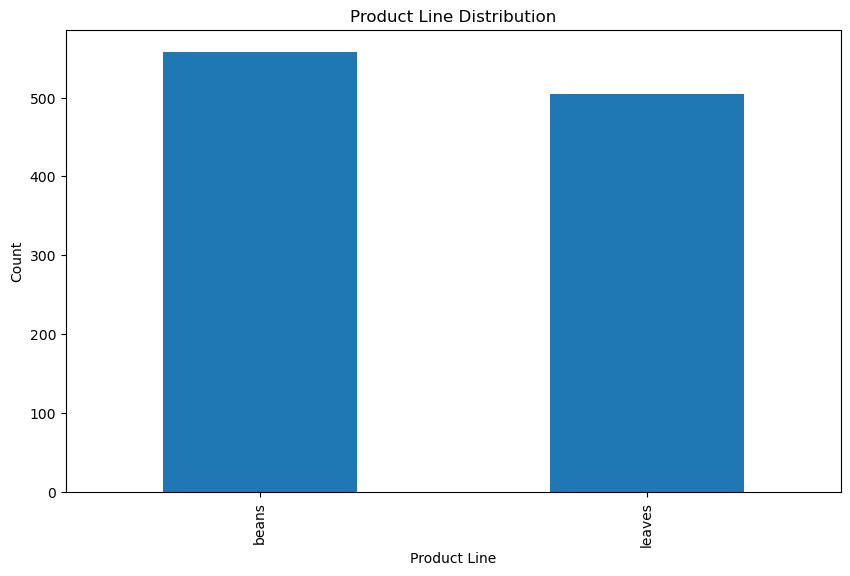

In [6]:
# Plot the distribution of product lines
plt.figure(figsize=(10, 6))
product_line_counts.plot(kind='bar', title='Product Line Distribution', xlabel='Product Line', ylabel='Count')
plt.show()

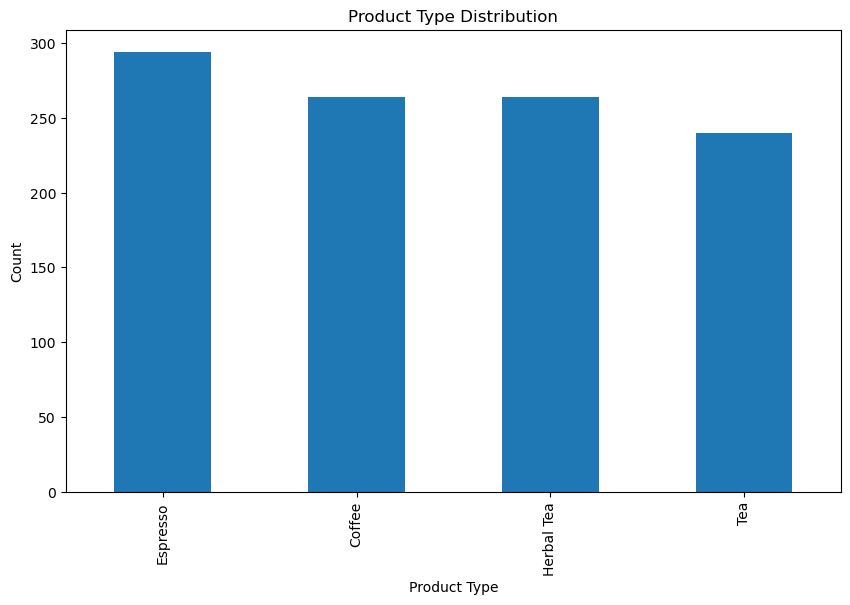

In [7]:
# Plot the distribution of product types
plt.figure(figsize=(10, 6))
product_type_counts.plot(kind='bar', title='Product Type Distribution', xlabel='Product Type', ylabel='Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

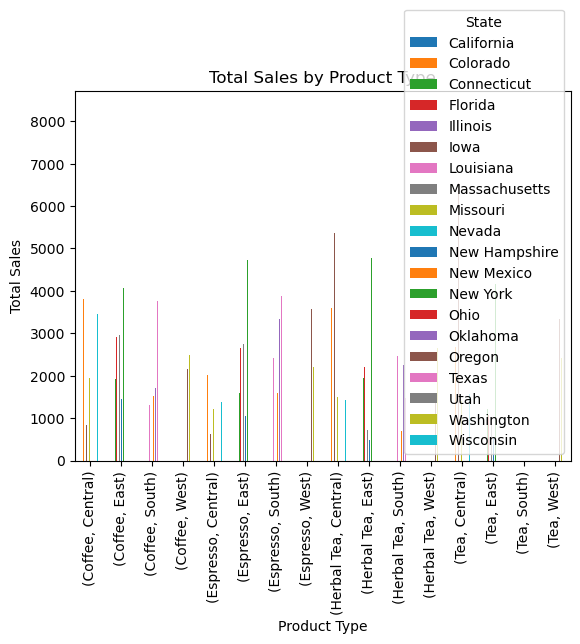

In [7]:
# Sales and Profit Analysis
# Group by product type, market, and state to get total sales and profit
sales_and_profit = data.groupby(['Product Type', 'Market', 'State'])[['Sales', 'Profit']].sum()

# Plot total sales by product type
plt.figure(figsize=(10, 6))
sales_and_profit['Sales'].unstack().plot(kind='bar', title='Total Sales by Product Type', xlabel='Product Type', ylabel='Total Sales')
plt.show()

In [10]:
import numpy as np

C:\Users\miral\AppData\Local\Temp\ipykernel_11404\1566217743.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_and_profit = data.groupby(['Product Type', 'Market', 'State'])[['Sales', 'Profit']].sum()


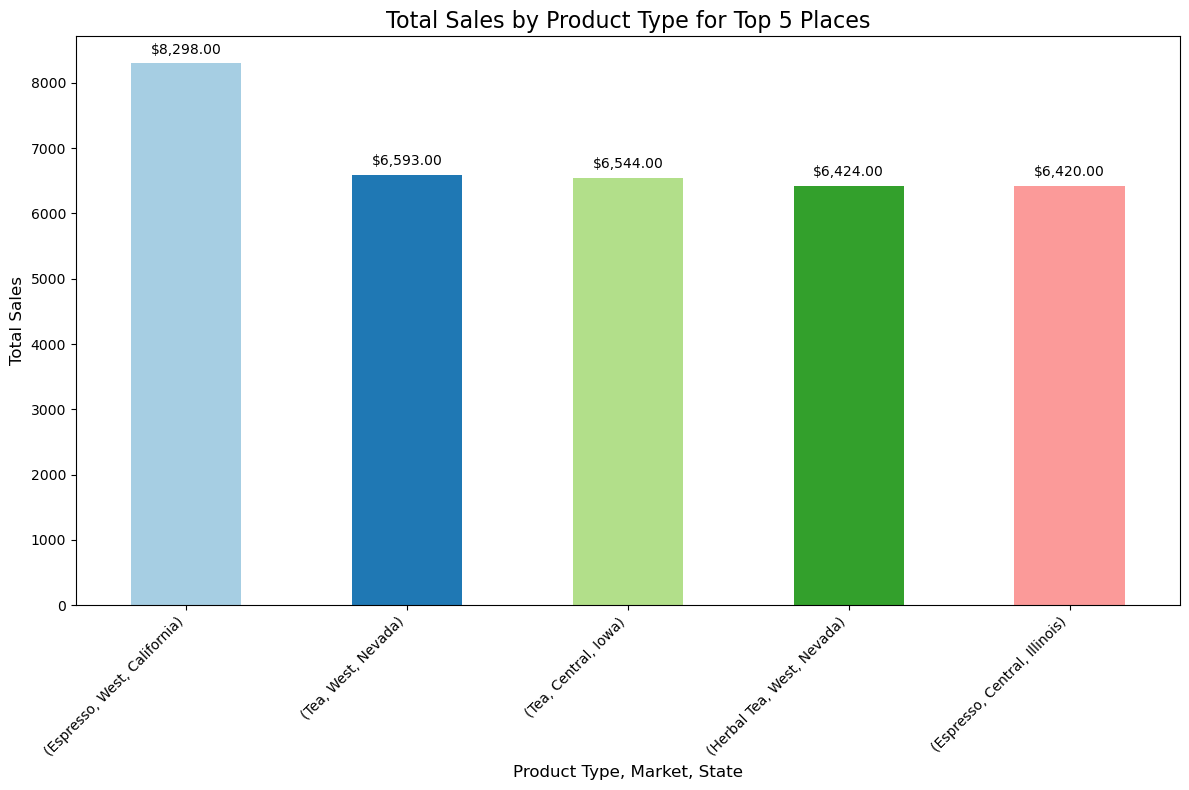

In [11]:
import matplotlib.pyplot as plt

# Sales and Profit Analysis
# Group by product type, market, and state to get total sales and profit
sales_and_profit = data.groupby(['Product Type', 'Market', 'State'])[['Sales', 'Profit']].sum()

# Sort by Sales in descending order and get the top 5
top_sales = sales_and_profit.sort_values(by='Sales', ascending=False).head(5)

# Plot total sales by product type for the top 5 places
plt.figure(figsize=(12, 8))  # Slightly larger figure for better visibility
ax = top_sales['Sales'].plot(kind='bar', color=plt.cm.Paired(np.arange(len(top_sales))))
plt.title('Total Sales by Product Type for Top 5 Places', fontsize=16)
plt.xlabel('Product Type, Market, State', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability

# Adding the text labels for sales values
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


C:\Users\miral\AppData\Local\Temp\ipykernel_11404\1917581493.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_and_profit = data.groupby(['Product Type', 'Market', 'State'])[['Sales', 'Profit']].sum()


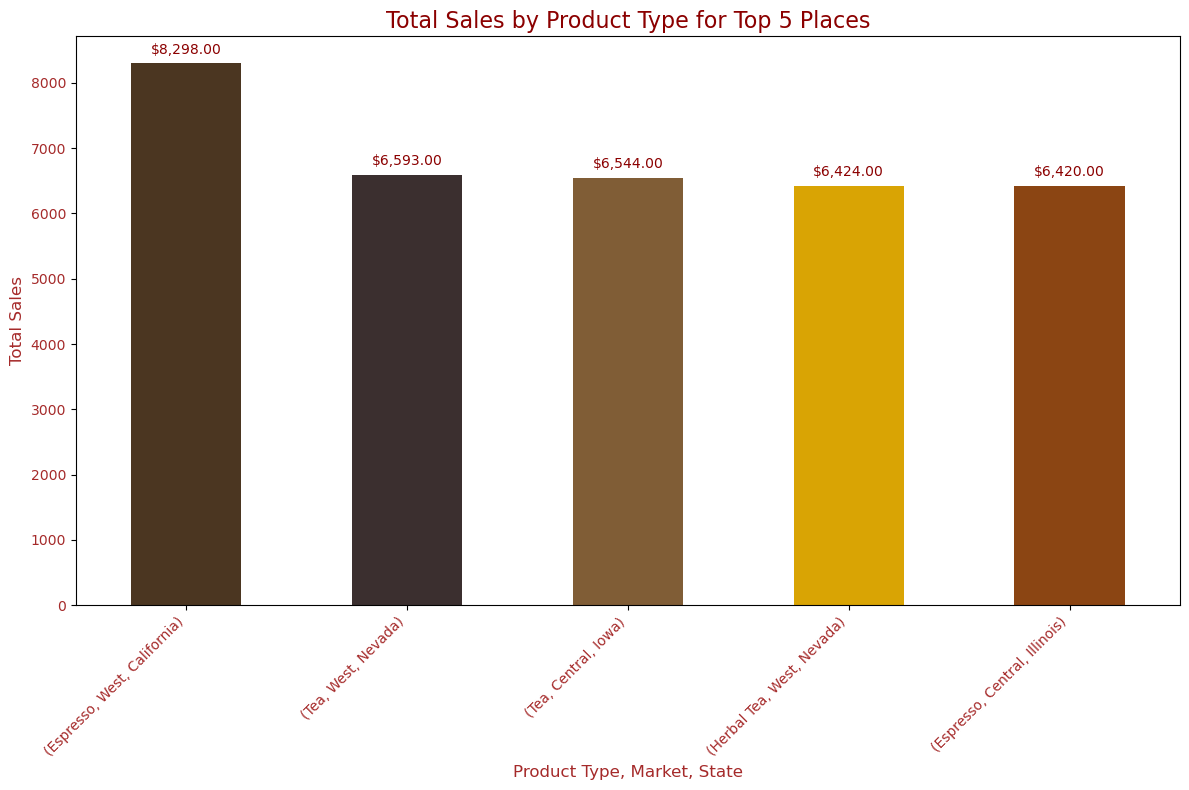

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Sales and Profit Analysis
# Group by product type, market, and state to get total sales and profit
sales_and_profit = data.groupby(['Product Type', 'Market', 'State'])[['Sales', 'Profit']].sum()

# Sort by Sales in descending order and get the top 5
top_sales = sales_and_profit.sort_values(by='Sales', ascending=False).head(5)

# Coffee themed colors
coffee_colors = ['#4B3621', '#3B2F2F', '#805D36', '#D9A404', '#8B4513']  # Resembling dark roast, medium roast, latte, macchiato, mocha

# Plot total sales by product type for the top 5 places
plt.figure(figsize=(12, 8))  # Slightly larger figure for better visibility
ax = top_sales['Sales'].plot(kind='bar', color=coffee_colors)
plt.title('Total Sales by Product Type for Top 5 Places', fontsize=16, color='darkred')
plt.xlabel('Product Type, Market, State', fontsize=12, color='brown')
plt.ylabel('Total Sales', fontsize=12, color='brown')
plt.xticks(rotation=45, ha='right', color='brown')  # Rotate labels for better readability
plt.yticks(color='brown')

# Adding the text labels for sales values
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='darkred')

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

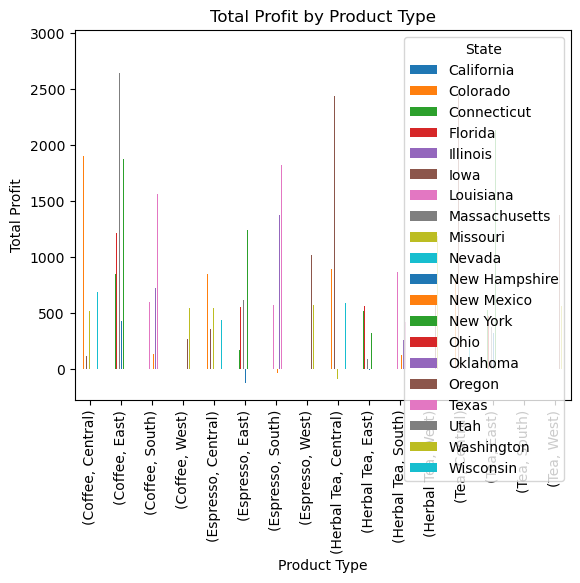

In [8]:
# Plot total profit by product type
plt.figure(figsize=(10, 6))
sales_and_profit['Profit'].unstack().plot(kind='bar', title='Total Profit by Product Type', xlabel='Product Type', ylabel='Total Profit')
plt.show()

In [10]:
# Calculate differences between actual and target metrics
data['Profit Difference'] = data['Profit'] - data['Target Profit']
data['Sales Difference'] = data['Sales'] - data['Target Sales']
data['COGS Difference'] = data['Cogs'] - data['Target COGS']
data['Margin Difference'] = data['Margin'] - data['Target Margin']


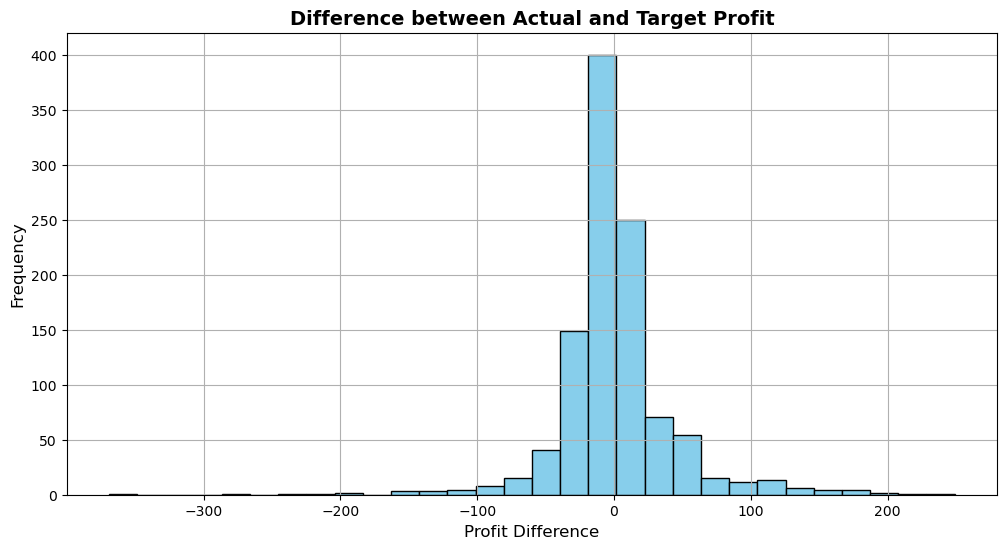

In [15]:
plt.figure(figsize=(12, 6))
plt.hist(data['Profit Difference'], bins=30, color='skyblue', edgecolor='black')  # Adjusted bins and color
plt.title("Difference between Actual and Target Profit", fontsize=14, fontweight='bold')  # Font styling
plt.xlabel("Profit Difference", fontsize=12)  # Improved labels
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)  # Add grid lines for better readability
plt.show()


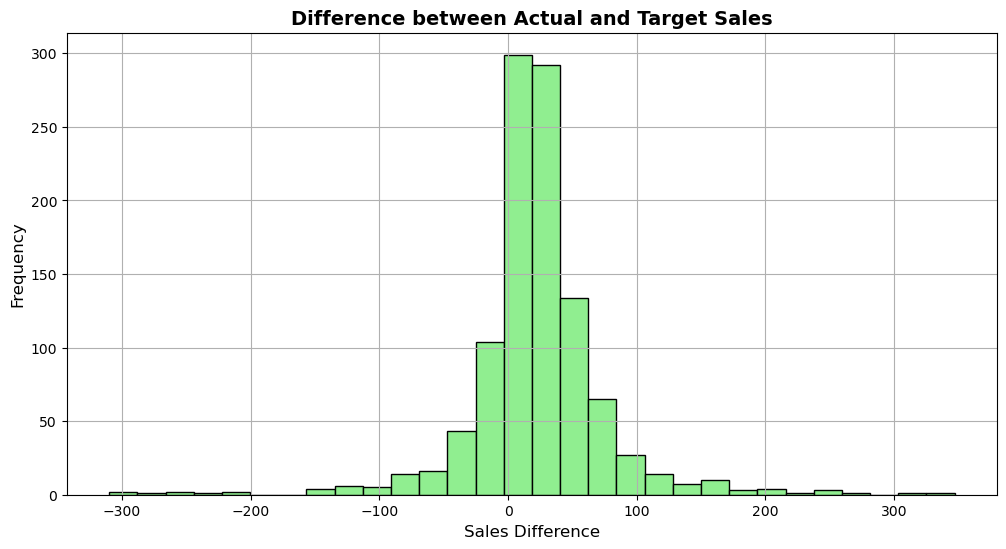

In [16]:
plt.figure(figsize=(12, 6))
plt.hist(data['Sales Difference'], bins=30, color='lightgreen', edgecolor='black')
plt.title("Difference between Actual and Target Sales", fontsize=14, fontweight='bold')
plt.xlabel("Sales Difference", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.show()


**Differences Between Actual and Target Metrics**:
   - Histograms of the differences between actual and target profits and sales indicate areas where the company is underperforming or overperforming against its goals. These could highlight successful products or markets, as well as those needing review or improvement strategies.


**Sales and Profit Analysis**:
   - The visualizations comparing total sales and profit by product type highlight which products are most lucrative and which generate the most sales. For example, some product types clearly outperform others in generating profit or sales, indicating potential areas for marketing focus or inventory adjustments.

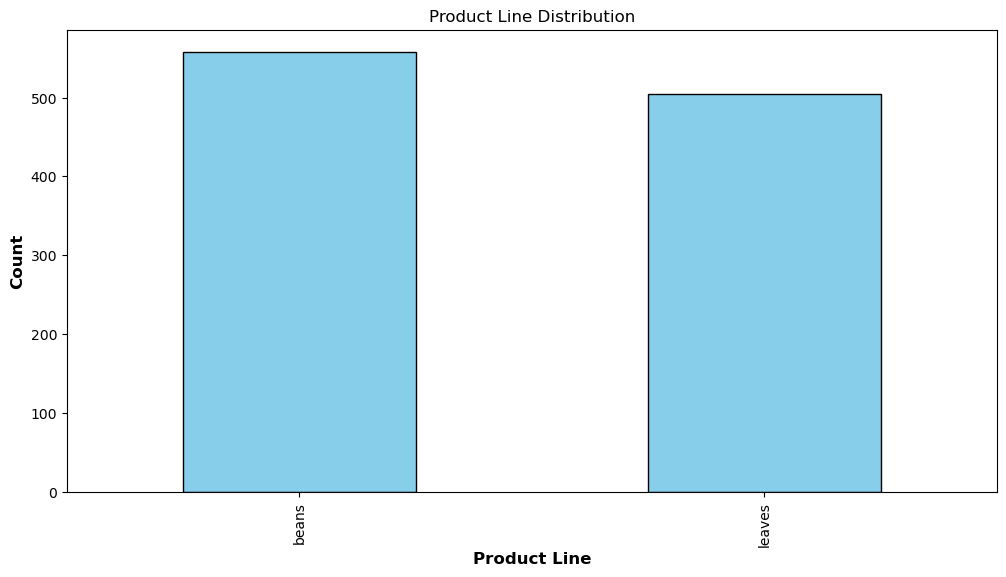

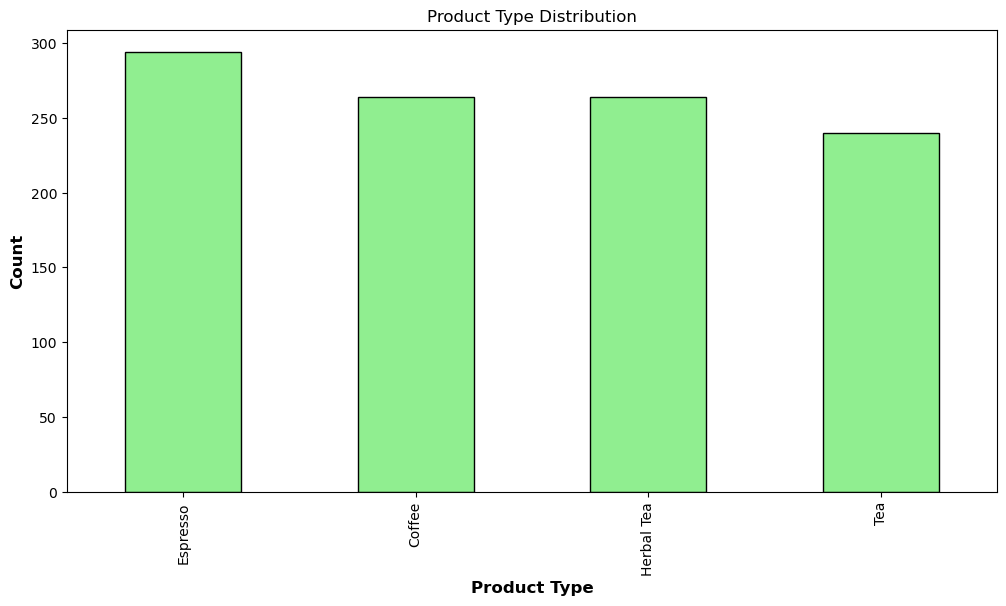

In [19]:
# Get counts for each Product Line and Product Type
product_line_counts = data['Product Line'].value_counts()  # Product Line distribution
product_type_counts = data['Product Type'].value_counts()  # Product Type distribution

# Plot distribution of Product Lines
plt.figure(figsize=(12, 6))
product_line_counts.plot(kind='bar', color='skyblue', edgecolor='black', title='Product Line Distribution')
plt.xlabel("Product Line", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.show()

# Plot distribution of Product Types
plt.figure(figsize=(12, 6))
product_type_counts.plot(kind='bar', color='lightgreen', edgecolor='black', title='Product Type Distribution')
plt.xlabel("Product Type", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.show()


**Product and Market Distribution**:
   - The distribution of product lines shows varied popularity, with some product lines being more frequent than others.
   - Coffee products like Lemon, Colombian, Caffe Mocha, and Decaf Espresso are among the most available, suggesting they are likely popular or staple offerings.

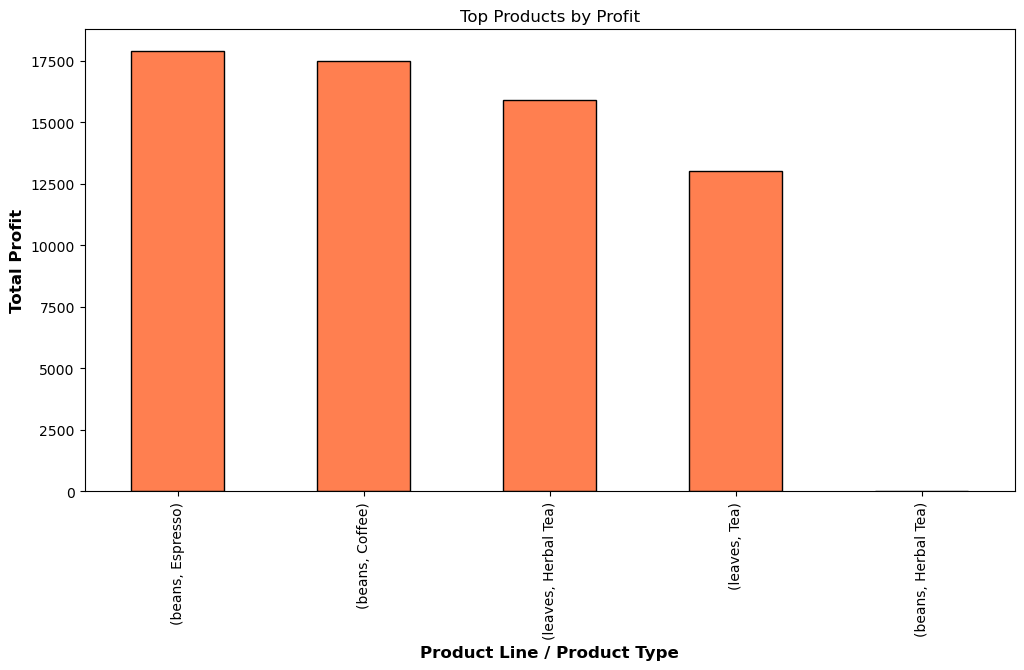

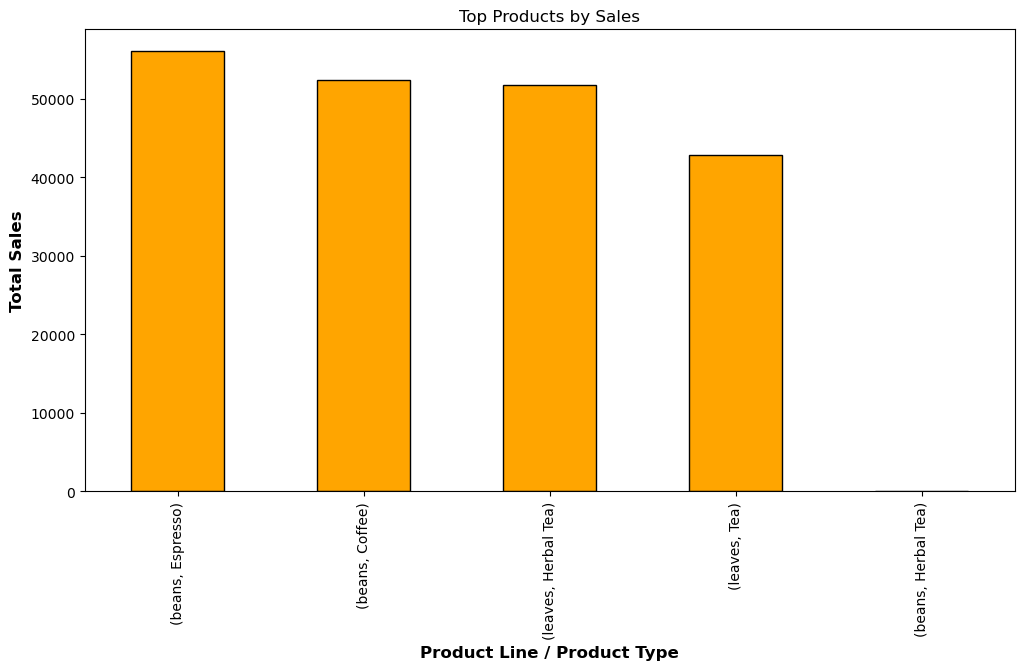

In [20]:
# Group by Product Line and Product Type, then get total Profit and Sales
profit_and_sales = data.groupby(['Product Line', 'Product Type'])[['Profit', 'Sales']].sum()

# Identify top 5 products by profit
top_products_by_profit = profit_and_sales['Profit'].nlargest(5)  # Top 5 products by profit

# Plot top products by profit
plt.figure(figsize=(12, 6))
top_products_by_profit.plot(kind='bar', color='coral', edgecolor='black', title='Top Products by Profit')
plt.xlabel("Product Line / Product Type", fontsize=12, fontweight='bold')
plt.ylabel("Total Profit", fontsize=12, fontweight='bold')
plt.show()

# Identify top 5 products by sales
top_products_by_sales = profit_and_sales['Sales'].nlargest(5)  # Top 5 products by sales

# Plot top products by sales
plt.figure(figsize=(12, 6))
top_products_by_sales.plot(kind='bar', color='orange', edgecolor='black', title='Top Products by Sales')
plt.xlabel("Product Line / Product Type", fontsize=12, fontweight='bold')
plt.ylabel("Total Sales", fontsize=12, fontweight='bold')
plt.show()


In [8]:
import pandas as pd

# Load the dataset
data_path = 'Coffee_Chain.csv'
coffee_chain_data = pd.read_csv(data_path)

# Counting unique values in 'Product', 'Market', 'State', and 'Type' columns
product_counts = coffee_chain_data['Product'].value_counts()
market_counts = coffee_chain_data['Market'].value_counts()
state_counts = coffee_chain_data['State'].value_counts()
type_counts = coffee_chain_data['Type'].value_counts()

# Print the results to see the distributions
print("Product Counts:")
print(product_counts)
print("\nMarket Counts:")
print(market_counts)
print("\nState Counts:")
print(state_counts)
print("\nType Counts:")
print(type_counts)


Product Counts:
Lemon                120
Colombian            120
Caffe Mocha          120
Decaf Espresso       102
Darjeeling            96
Decaf Irish Cream     96
Chamomile             96
Green Tea             72
Earl Grey             72
Caffe Latte           54
Mint                  48
Amaretto              48
Regular Espresso      18
Name: Product, dtype: int64

Market Counts:
Central    336
West       336
East       222
South      168
Name: Market, dtype: int64

State Counts:
California       72
Utah             72
Colorado         66
Nevada           66
Oregon           66
Washington       60
Missouri         54
Florida          54
Iowa             54
Ohio             54
Illinois         54
Wisconsin        54
New York         48
Texas            42
New Hampshire    42
Oklahoma         42
New Mexico       42
Connecticut      42
Louisiana        42
Massachusetts    36
Name: State, dtype: int64

Type Counts:
Regular    600
Decaf      462
Name: Type, dtype: int64


In [9]:
import pandas as pd

# Load the dataset
data_path = 'Coffee_Chain.csv'
coffee_chain_data = pd.read_csv(data_path)

# Cross-tabulation between 'Product' and 'Market'
product_market_crosstab = pd.crosstab(coffee_chain_data['Product'], coffee_chain_data['Market'])
print("Product-Market Crosstab:")
print(product_market_crosstab)

# Cross-tabulation between 'Product' and 'State'
product_state_crosstab = pd.crosstab(coffee_chain_data['Product'], coffee_chain_data['State'])
print("\nProduct-State Crosstab:")
print(product_state_crosstab)


Product-Market Crosstab:
Market             Central  East  South  West
Product                                      
Amaretto                24     6      0    18
Caffe Latte              0     0     24    30
Caffe Mocha             36    30     24    30
Chamomile               36     6     24    30
Colombian               36    30     24    30
Darjeeling              36    30      0    30
Decaf Espresso          36    12     24    30
Decaf Irish Cream       36     6     24    30
Earl Grey               36     6      0    30
Green Tea               12    30      0    30
Lemon                   36    30     24    30
Mint                    12    18      0    18
Regular Espresso         0    18      0     0

Product-State Crosstab:
State              California  Colorado  Connecticut  Florida  Illinois  Iowa  \
Product                                                                         
Amaretto                    6         6            0        0         0     6   
Caffe Latte      

**Cross-tabulation Insights**:
   - The cross-tabulation between products and markets or states reveals how products are distributed across different locations. This could inform decisions on product placement and targeted marketing.


# Text - Mining

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load the dataset
data_path = 'Coffee_Chain.csv'
coffee_chain_data = pd.read_csv(data_path)

# Focus on the 'Product' column for text mining
product_text = coffee_chain_data['Product']

# Create a CountVectorizer to analyze keywords and n-grams
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))  # ngram_range=(1, 2) for both single words and bi-grams

# Fit and transform the data
product_matrix = vectorizer.fit_transform(product_text)

# Summing up the occurrence of each word/n-gram
word_counts = pd.DataFrame(product_matrix.sum(axis=0), columns=vectorizer.get_feature_names_out(), index=['count']).T.sort_values('count', ascending=False)

print("Most common words and bi-grams in the Product column:")
print(word_counts.head(20))  # Show top 20 words and bi-grams


Most common words and bi-grams in the Product column:
                count
decaf             198
caffe             174
espresso          120
mocha             120
caffe mocha       120
colombian         120
lemon             120
decaf espresso    102
chamomile          96
cream              96
darjeeling         96
decaf irish        96
irish cream        96
irish              96
grey               72
tea                72
green tea          72
green              72
earl grey          72
earl               72


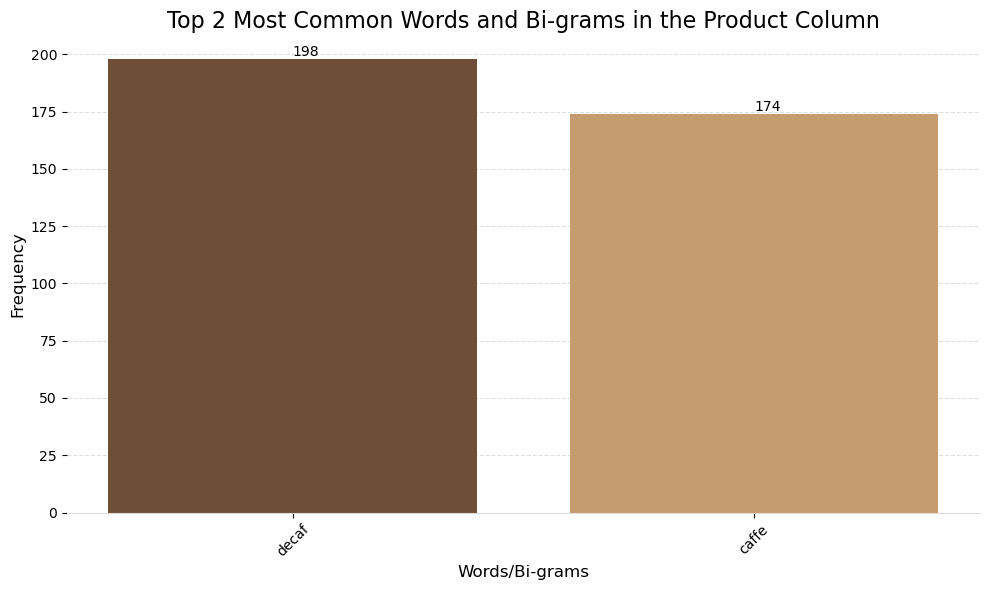

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'Coffee_Chain.csv'  # Update this path
coffee_chain_data = pd.read_csv(data_path)

# Focus on the 'Product' column for text mining
product_text = coffee_chain_data['Product']

# Create a CountVectorizer to analyze keywords and n-grams
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))  # ngram_range=(1, 2) for both single words and bi-grams

# Fit and transform the data
product_matrix = vectorizer.fit_transform(product_text)

# Summing up the occurrence of each word/n-gram
word_counts = pd.DataFrame(product_matrix.sum(axis=0), columns=vectorizer.get_feature_names_out(), index=['count']).T.sort_values('count', ascending=False)

# Plotting the most common words and bi-grams
top_n = 2
top_words = word_counts.head(top_n)

plt.figure(figsize=(10, 6))  # Adjust size as needed
ax = plt.gca()  # Get current axis
bars = plt.bar(top_words.index, top_words['count'], color=['#6f4e37', '#c69c6e'])  # Use coffee-themed colors

plt.title('Top 2 Most Common Words and Bi-grams in the Product Column', fontsize=16)
plt.xlabel('Words/Bi-grams', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Adding grid lines and removing the frame for a cleaner look
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Adding value annotations on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), va='bottom')  # va: vertical alignment

plt.tight_layout()
plt.show()


**Text Analysis of Product Names**:
   - Text mining on product names shows frequent use of terms like 'decaf', 'espresso', and 'caffe', suggesting these are common or preferred coffee options. The frequency of these terms might indicate consumer preferences or successful product ranges.

In [18]:
data = data.drop('记录数', axis=1)

In [19]:
data.columns

Index(['Area Code', 'Cogs', 'Difference Between Actual and Target Profit',
       'Date', 'Inventory', 'Margin', 'Market Size', 'Market', 'Marketing',
       'Product Line', 'Product Type', 'Product', 'Profit', 'Sales', 'State',
       'Target COGS', 'Target Margin', 'Target Profit', 'Target Sales',
       'Total Expenses', 'Type'],
      dtype='object')

In [20]:
data.to_csv('Coffee_Chain.csv', index=False)

In [21]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Load the dataset
data_path = 'Coffee_Chain.csv'  # Update this path
coffee_chain_data = pd.read_csv(data_path)

# Focusing on the 'Product' column for topic modeling
product_text = coffee_chain_data['Product']

# Vectorizing the data for LDA
vectorizer = CountVectorizer(stop_words='english')
product_matrix = vectorizer.fit_transform(product_text)

# Performing LDA
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(product_matrix)

# Getting the words for each topic
words = vectorizer.get_feature_names_out()
topic_summaries = []
for topic_idx, topic in enumerate(lda.components_):
    top_features_ind = topic.argsort()[:-11:-1]
    top_features = [words[i] for i in top_features_ind]
    topic_summaries.append("Topic {}: {}".format(topic_idx + 1, ", ".join(top_features)))

# Print the topics found by the LDA model
for summary in topic_summaries:
    print(summary)


Topic 1: darjeeling, grey, earl, amaretto, mint, regular, espresso, chamomile, lemon, colombian
Topic 2: colombian, lemon, chamomile, regular, amaretto, mint, darjeeling, decaf, tea, green
Topic 3: caffe, mocha, latte, regular, mint, amaretto, darjeeling, chamomile, lemon, colombian
Topic 4: espresso, decaf, regular, amaretto, mint, darjeeling, chamomile, lemon, colombian, green
Topic 5: cream, irish, decaf, tea, green, regular, mint, amaretto, darjeeling, chamomile


The Latent Dirichlet Allocation (LDA) model applied to the 'Product' column of your "Coffee Chain" dataset has generated five distinct topics, each representing a group of words frequently occurring together in your product names. Here's a breakdown of each topic with potential interpretations:

1. **Topic 1 - Specialty Teas and Flavors**:
   - **Keywords**: darjeeling, grey, earl, amaretto, mint, regular, espresso, chamomile, lemon, colombian
   - **Interpretation**: This topic seems to focus on specialty tea products like Earl Grey and Darjeeling, mixed with a variety of other flavors including Amaretto and Mint.

2. **Topic 2 - Classic and Herbal Varieties**:
   - **Keywords**: colombian, lemon, chamomile, regular, amaretto, mint, darjeeling, decaf, tea, green
   - **Interpretation**: This topic includes a mix of classic coffee options like Colombian, complemented by herbal and traditional tea flavors like Chamomile and Green Tea.

3. **Topic 3 - Caffeinated Specialties**:
   - **Keywords**: caffe, mocha, latte, regular, mint, amaretto, darjeeling, chamomile, lemon, colombian
   - **Interpretation**: Focused on caffeinated drinks, this topic includes popular coffeehouse staples like Caffe Mocha and Caffe Latte.

4. **Topic 4 - Decaffeinated and Espresso Options**:
   - **Keywords**: espresso, decaf, regular, amaretto, mint, darjeeling, chamomile, lemon, colombian, green
   - **Interpretation**: This topic seems to cover espresso and decaffeinated choices, catering to those who prefer less caffeine or more intense coffee flavors.

5. **Topic 5 - Creamy and Irish Flavors**:
   - **Keywords**: cream, irish, decaf, tea, green, regular, mint, amaretto, darjeeling, chamomile
   - **Interpretation**: Encompassing creamier and richer flavors, this topic includes Irish Cream and various teas, suggesting a preference for smooth, flavorful options.

# Sentiment Analysis

In [3]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(9.7,6.27)})
sns.set_style("white")

import warnings
warnings.filterwarnings("ignore")


from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer


from wordcloud import WordCloud

from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\miral\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --------- ------------------------------ 71.7/300.2 kB 4.1 MB/s eta 0:00:01
   -------------------- ------------------- 153.6/300.2 kB 1.8 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/300.2 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv('Coffee_reviews.csv')
df.head(5)

,page,name,link,thumbnail,rating,date,snippet,images,local_guide,CoffeeShop
0,1,J Wang,https://www.google.com/maps/contrib/1066405393...,https://lh3.googleusercontent.com/a/ALm5wu2QSW...,1.0,10 months ago,Ordered take away lunch and received this burn...,['https://lh5.googleusercontent.com/p/AF1QipNc...,True,Paramount Coffee Project
1,1,Manish Rai,https://www.google.com/maps/contrib/1087306153...,https://lh3.googleusercontent.com/a/ALm5wu0hYM...,1.0,6 months ago,"TLDR/Long story short: Wrong pricing online, o...",['https://lh5.googleusercontent.com/p/AF1QipO-...,NaN,Paramount Coffee Project
2,1,Lisa,https://www.google.com/maps/contrib/1090187054...,https://lh3.googleusercontent.com/a-/ACNPEu-sy...,1.0,3 months ago,Drinks order was taken and drinks never arrive...,NaN,NaN,Paramount Coffee Project
3,1,Angel Manuel,https://www.google.com/maps/contrib/1127216205...,https://lh3.googleusercontent.com/a-/ACNPEu850...,1.0,2 months ago,"I came here twice, poor service. I ordered gre...",NaN,NaN,Paramount Coffee Project
4,1,Jisoo,https://www.google.com/maps/contrib/1168975833...,https://lh3.googleusercontent.com/a/ALm5wu25sD...,1.0,a year ago,We came here because the coffee shop we were g...,['https://lh5.googleusercontent.com/p/AF1QipOG...,NaN,Paramount Coffee Project


In [5]:
# Remove empty record
df = df[~df.snippet.isnull()].reset_index(drop=True)

In [6]:
# Explore distribution of scoring
df.groupby('rating')['snippet'].count()

rating
1.0    258
2.0    128
3.0    137
4.0    166
5.0    475
Name: snippet, dtype: int64

In [7]:
data = df.groupby('rating')['snippet'].count()
data

rating
1.0    258
2.0    128
3.0    137
4.0    166
5.0    475
Name: snippet, dtype: int64

In [8]:
data = data.to_frame().reset_index()

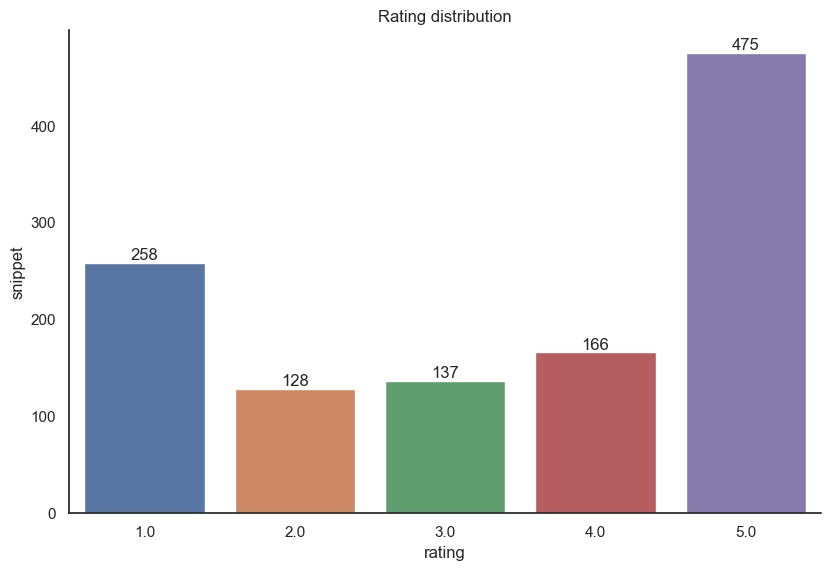

In [9]:
# Explore distribution of scoring
ax = sns.barplot(data=data, x='rating', y="snippet")
ax.bar_label(ax.containers[0])
ax.set(title='Rating distribution')
sns.despine()

In [10]:
# Assign labels
df['sentiment']=df['rating'].apply(lambda x: 1 if x==5  else -1 if 0<x<3 else 0)
df['sentiment_desc']=df['rating'].apply(lambda x: 'positive' if x==5  else 'negative' if 0<x<3 else 'neutral')

In [11]:
# Check if it works
df[['snippet', 'rating', 'sentiment']].head(5)

,snippet,rating,sentiment
0,Ordered take away lunch and received this burn...,1.0,-1
1,"TLDR/Long story short: Wrong pricing online, o...",1.0,-1
2,Drinks order was taken and drinks never arrive...,1.0,-1
3,"I came here twice, poor service. I ordered gre...",1.0,-1
4,We came here because the coffee shop we were g...,1.0,-1


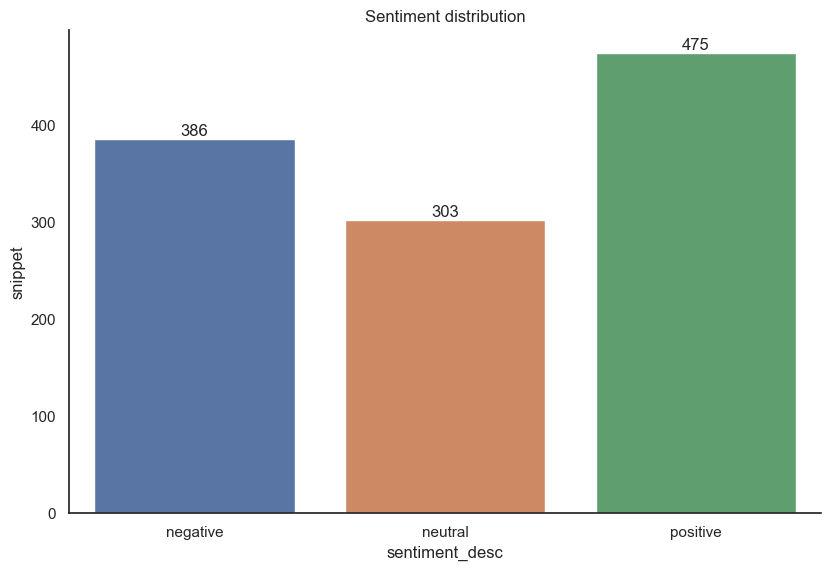

In [12]:
# Explore distribution of sentiment
data2 = df.groupby('sentiment_desc')['snippet'].count()
data2 = data2.to_frame().reset_index()
ax = sns.barplot(data=data2, x='sentiment_desc', y="snippet")
ax.bar_label(ax.containers[0])
ax.set(title='Sentiment distribution')
sns.despine()

In [13]:
data

,rating,snippet
0,1.0,258
1,2.0,128
2,3.0,137
3,4.0,166
4,5.0,475


In [14]:
negative_prop = round(len(df[df.sentiment==-1])/len(df), 2)
neutral_prop = round(len(df[df.sentiment==0])/len(df), 2)
positive_prop = round(len(df[df.sentiment==1])/len(df), 2)

In [15]:
target_df = pd.DataFrame({'sentiment': ['negative', 'neutral', 'positive'],
                            'proportions': [negative_prop, neutral_prop, positive_prop]})

In [16]:
print ('This dataset is balanced: '
       'negative reviews: %s, '
       'neutral reviews: %s, '
       'positive reviews: %s' %
       (str(negative_prop),
        str(neutral_prop),
        str(positive_prop)))

This dataset is balanced: negative reviews: 0.33, neutral reviews: 0.26, positive reviews: 0.41


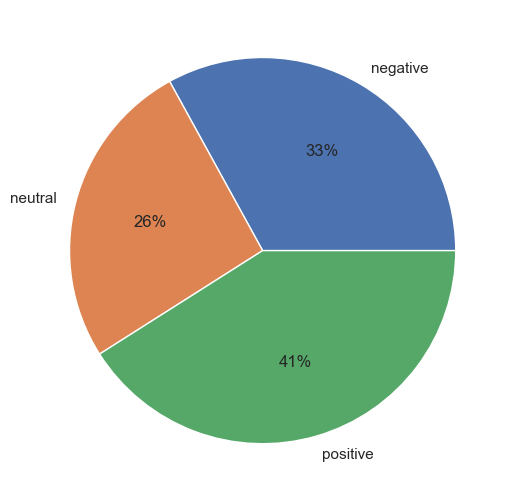

In [17]:
plt.pie(target_df['proportions'], labels = target_df['sentiment'], autopct='%.0f%%')
plt.show()

**Preprocess Data for Sentiment analysis**

In [18]:
#Select only needed columns
data = df[['snippet', 'sentiment']]

In [19]:
data.head(5)

,snippet,sentiment
0,Ordered take away lunch and received this burn...,-1
1,"TLDR/Long story short: Wrong pricing online, o...",-1
2,Drinks order was taken and drinks never arrive...,-1
3,"I came here twice, poor service. I ordered gre...",-1
4,We came here because the coffee shop we were g...,-1


In [20]:
# Remove punctuations
data['tidy_snippet'] = data['snippet'].str.replace("[^a-zA-Z#]", " ")

In [21]:
# Prepare list of stops words from nltk
stop_words=stopwords.words('english')

In [22]:
# Define custom stop words
my_stop_words = ['coffee','cafe', 'food', 'today', 'yesterday', 'place', 'staff', 'breakfast']

In [23]:
# Combine two lists
stop_words = stop_words + my_stop_words

In [24]:
# Remove stop words
data['tidy_snippet'] = data['tidy_snippet'].apply(lambda x: ' '.join([w for w in x.lower().split() if w not in stop_words]))

In [25]:
## Stemming
stemmer=PorterStemmer()
data['stem_snippet']  = data['tidy_snippet'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [26]:
## Lemmatization
lemmatizer = WordNetLemmatizer()
data['lem_snippet'] = data['tidy_snippet'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [27]:
# Check out differences
data[['tidy_snippet', 'stem_snippet', 'lem_snippet']].head(5)

,tidy_snippet,stem_snippet,lem_snippet
0,ordered take away lunch received burned toasti...,order take away lunch receiv burn toasti (hidd...,ordered take away lunch received burned toasti...
1,"tldr/long story short: wrong pricing online, o...","tldr/long stori short: wrong price online, ove...","tldr/long story short: wrong pricing online, o..."
2,"drinks order taken drinks never arrived, chase...","drink order taken drink never arrived, chase u...","drink order taken drink never arrived, chase u..."
3,"came twice, poor service. ordered green tea, r...","came twice, poor service. order green tea, rec...","came twice, poor service. ordered green tea, r..."
4,came shop gonna go closed. ordered housemade g...,came shop gonna go closed. order housemad gran...,came shop gonna go closed. ordered housemade g...


In [28]:
# Two X prepared separately
X_stem = data['stem_snippet']
X_lem = data['lem_snippet']
y = data['sentiment']

In [29]:
# Count Vectorizer with stemming
cv_stem=CountVectorizer(max_features=3000)
X_count_vec_stem =cv_stem.fit_transform(X_stem)

In [30]:
# Count Vectorizer with lemmatization
cv_lem=CountVectorizer(max_features=3000)
X_count_vec_lem = cv_lem.fit_transform(X_lem)

In [31]:
# TD-IDF with stemming
tfidf_stem =TfidfVectorizer(max_features=3000)
X_tfidf_stem =tfidf_stem.fit_transform(X_stem)

In [32]:
# TD-IDF with lemmatization data
tfidf_lem =TfidfVectorizer(max_features=3000)
X_tfidf_lem =tfidf_lem.fit_transform(X_lem)

**Visuals for Sentiments**

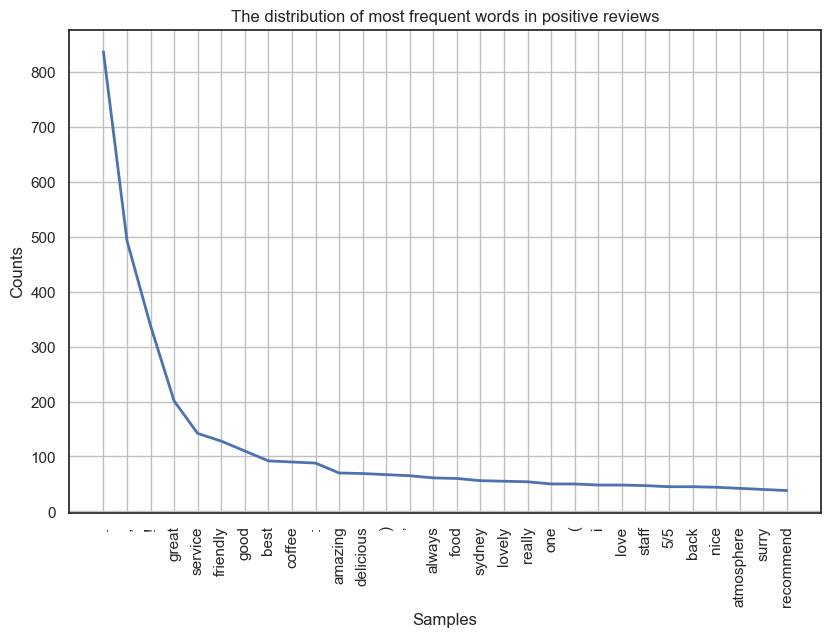

<Axes: title={'center': 'The distribution of most frequent words in positive reviews'}, xlabel='Samples', ylabel='Counts'>

In [33]:
# Positive words
positive = data[data.sentiment == 1]
a = positive['tidy_snippet'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist_pos = nltk.FreqDist(words)
word_dist_pos.plot(30, cumulative=False, title='The distribution of most frequent words in positive reviews')

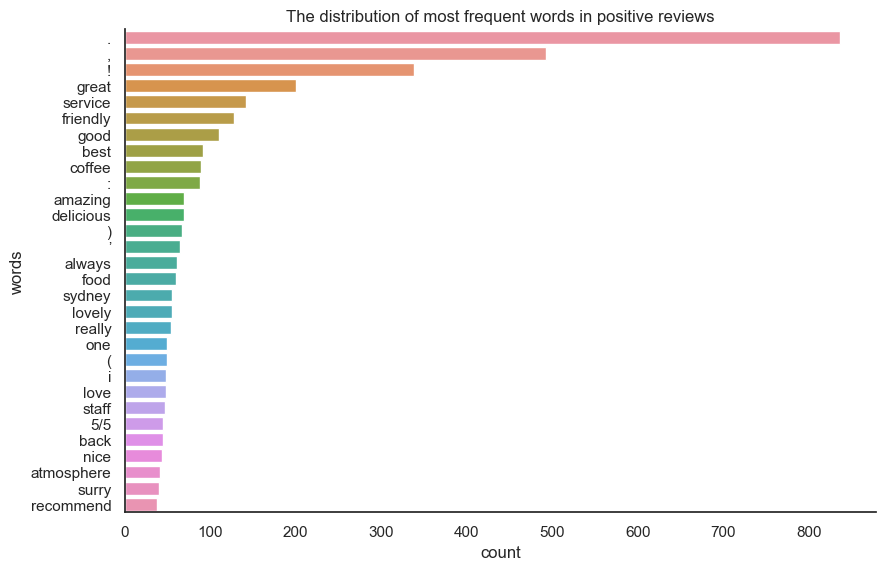

In [34]:
df_pos = pd.DataFrame({'words':list(word_dist_pos.keys()),'count':list(word_dist_pos.values())})
df_po_plot = df_pos.nlargest(30,columns='count')

sns.barplot(data=df_po_plot,y='words',x='count').set_title('The distribution of most frequent words in positive reviews')
sns.despine()

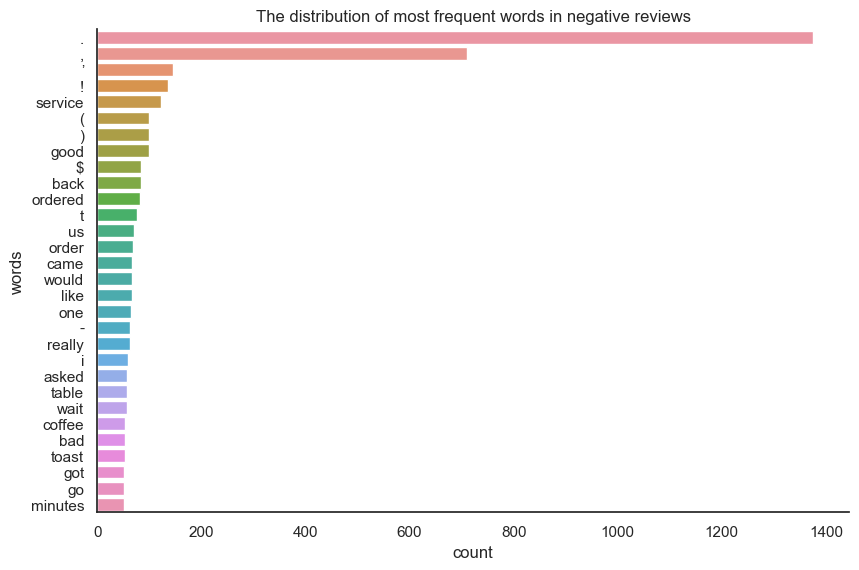

In [35]:
## Let's do the same for negative sentiment
negative = data[data.sentiment == -1]
b = negative['tidy_snippet'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(b)
word_dist_neg = nltk.FreqDist(words)

df_neg = pd.DataFrame({'words':list(word_dist_neg.keys()),'count':list(word_dist_neg.values())})
df_neg_plot = df_neg.nlargest(30,columns='count')

sns.barplot(data=df_neg_plot, y='words',x='count').set_title('The distribution of most frequent words in negative reviews')
sns.despine()


# Word Cloud

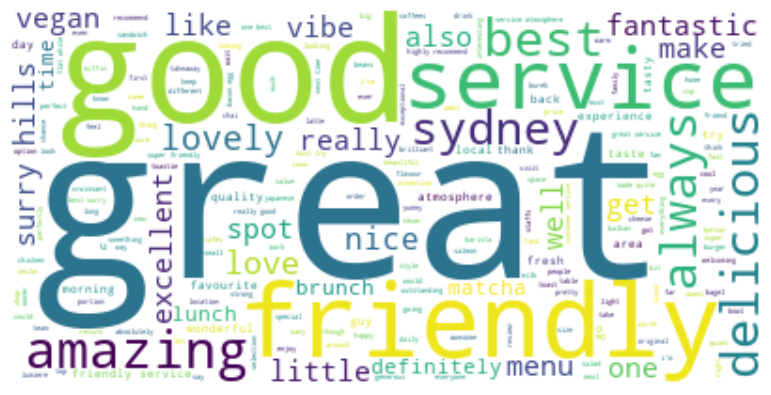

In [36]:
positive = data[data.sentiment == 1]['tidy_snippet']
text_p = " ".join(review for review in positive)

# Generate a word cloud image
wordcloud_p = WordCloud(stopwords=stop_words, background_color="white").generate(text_p)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_p, interpolation='bilinear')
plt.axis("off")
plt.show()

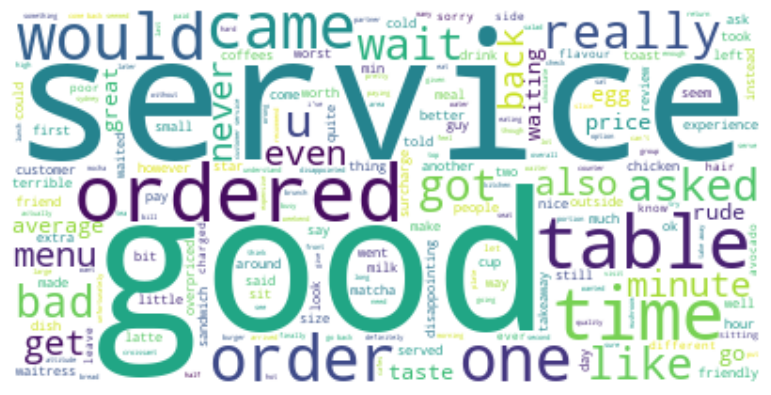

In [37]:
negative = data[data.sentiment == -1]['tidy_snippet']
text_n = " ".join(review for review in negative)

# Generate a word cloud image
wordcloud_n = WordCloud(stopwords=stop_words, background_color="white").generate(text_n)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_n, interpolation='bilinear')
plt.axis("off")
plt.show()